<a href="https://colab.research.google.com/github/Thikshaya555/machinelearning/blob/master/autoencoding1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow==1.14.0

In [ ]:
%tensorflow_version 1.x

TensorFlow is already loaded. Please restart the runtime to change versions.


In [ ]:
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
import matplotlib.pyplot as plt

In [ ]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [ ]:
#import libraries and dataset
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

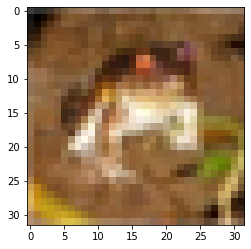

In [ ]:
#visualize a sample image
plt.imshow(x_train[0],cmap='gray')

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

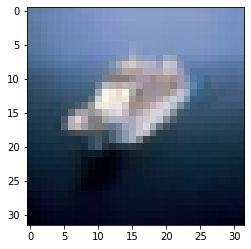

In [ ]:
#performing data visualization
i=random.randint(1,50000)
plt.imshow(x_train[i],cmap='gray')

In [ ]:
label=y_train[i]
label

array([8], dtype=uint8)

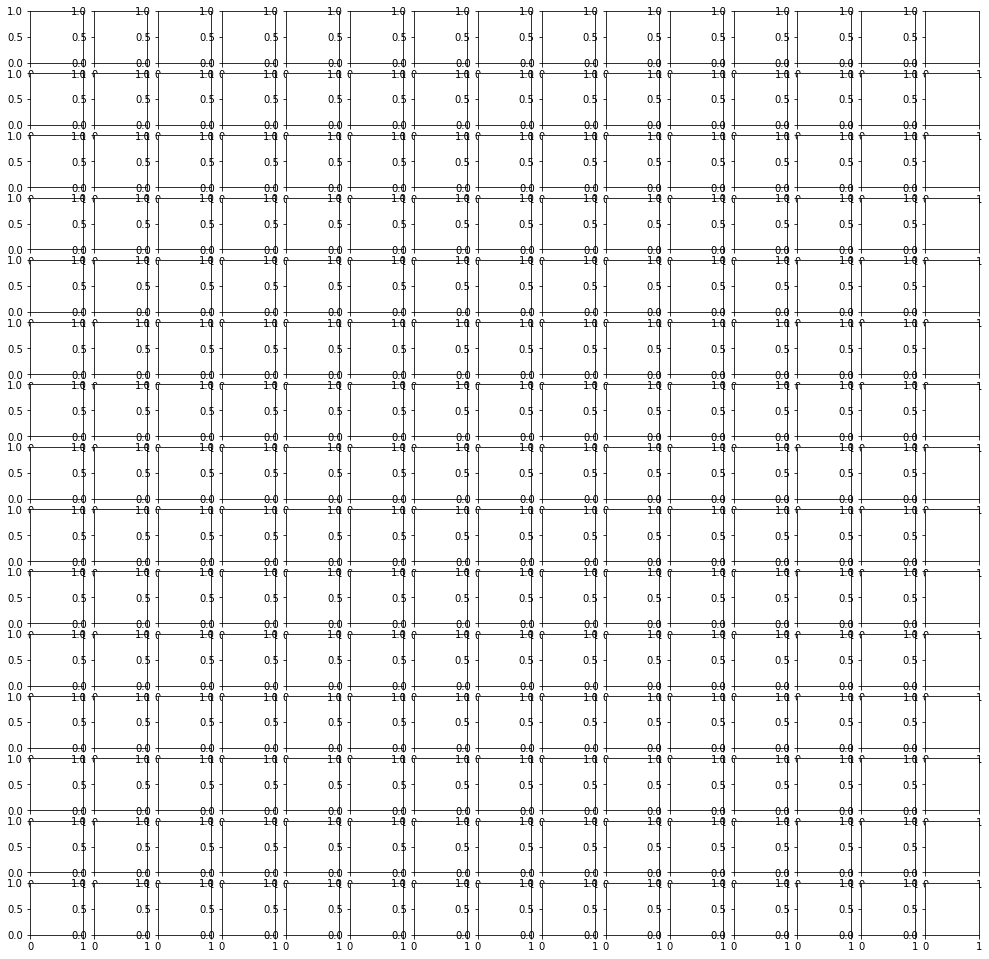

In [ ]:
w_grid=15
l_grid=15
fig,axes=plt.subplots(l_grid,w_grid,figsize=(17,17))
axes=axes.ravel()
n_training=len(x_train)

In [ ]:
for i in np.arange(0,w_grid*l_grid):
  index=np.random.randint(0,n_training)
  axes[i].imshow(x_train[index])
  axes[i].imshow(x_train[index])
  axes[i].set_title(y_train[index],fontsize=8)
  axes[i].axis('off')

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


In [ ]:
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255

In [ ]:
x_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [ ]:
x_test

array([[[[0.61960787, 0.4392157 , 0.19215687],
         [0.62352943, 0.43529412, 0.18431373],
         [0.64705884, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254903, 0.14117648],
         [0.49411765, 0.35686275, 0.14117648],
         [0.45490196, 0.33333334, 0.12941177]],

        [[0.59607846, 0.4392157 , 0.2       ],
         [0.5921569 , 0.43137255, 0.15686275],
         [0.62352943, 0.44705883, 0.1764706 ],
         ...,
         [0.53333336, 0.37254903, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509805, 0.13333334]],

        [[0.5921569 , 0.43137255, 0.18431373],
         [0.5921569 , 0.42745098, 0.12941177],
         [0.61960787, 0.43529412, 0.14117648],
         ...,
         [0.54509807, 0.38431373, 0.13333334],
         [0.50980395, 0.37254903, 0.13333334],
         [0.47058824, 0.34901962, 0.12941177]],

        ...,

        [[0.26666668, 0.4862745 , 0.69411767],
         [0.16470589, 0.39215687, 0.5803922 ]

In [ ]:
noise_factor=0.1
noise_dataset=[]
for img in x_train:
  noisy_image = img+noise_factor*np.random.randn(*img.shape)
  noisy_image=np.clip(noisy_image,0,1)
  noise_dataset.append(noisy_image)

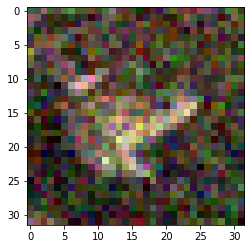

In [ ]:
plt.imshow(noise_dataset[22],cmap='gray')

In [ ]:
from google.colab import files
uploaded=files.upload()
my_image=plt.imread('flight.jpeg')

Saving flight.jpeg to flight.jpeg


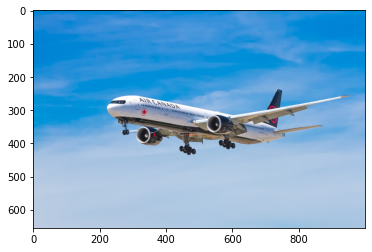

In [ ]:
img=plt.imshow(my_image)

In [ ]:
from skimage.transform import resize
my_image_resized=resize(my_image,(32,32,3))
img=plt.show(my_image_resized)

ValueError: ignored

In [ ]:
#add noise to the test data
noise_factor=0.1
noise_test_dataset=[]
for img in x_test:
  noisy_image = img+noise_factor*np.random.randn(*img.shape)
  noisy_image=np.clip(noisy_image,0,1)
  noise_test_dataset.append(noisy_image)

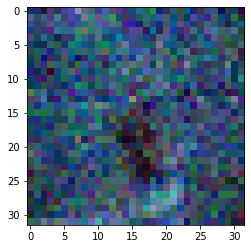

In [ ]:
plt.imshow(noise_test_dataset[22],cmap='gray')

In [ ]:
autoencoder=tf.keras.models.Sequential()

In [ ]:
#encoder
autoencoder.add(tf.keras.layers.Conv2D(32,(3,3),padding='same',input_shape=(32,32,3)))

In [ ]:
autoencoder.add(tf.keras.layers.Conv2D(16,(3,3),padding='same'))
autoencoder.add(tf.keras.layers.Conv2D(16,(3,3),padding='same'))
#decoder
autoencoder.add(tf.keras.layers.Conv2DTranspose(32,(3,3),padding='same'))
autoencoder.add(tf.keras.layers.Conv2DTranspose(3,(3,3),activation='sigmoid',padding='same'))

In [ ]:
autoencoder.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 32, 32, 16)        4624      
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 32, 32, 16)        2320      
_________________________________________________________________
conv2d_transpose_30 (Conv2DT (None, 32, 32, 32)        4640      
_________________________________________________________________
conv2d_transpose_31 (Conv2DT (None, 32, 32, 3)         867       
Total params: 13,347
Trainable params: 13,347
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.fit(noise_dataset.reshape(-1,32,32,3),
                x_train.reshape(-1,32,32,3),
                epochs=5,
                batch_size = 200,
                validation_data=(noise_test_dataset.reshape(-1,32,32,3),x_test.reshape(-3,32,32,3)))


Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 282s 6ms/sample - loss: 0.5705 - val_loss: 0.5601
Epoch 2/5
50000/50000 [==============================] - 282s 6ms/sample - loss: 0.5579 - val_loss: 0.5577
Epoch 3/5
50000/50000 [==============================] - 283s 6ms/sample - loss: 0.5567 - val_loss: 0.5579
Epoch 4/5
41600/50000 [=======================>......] - ETA: 45s - loss: 0.5566

In [ ]:
noise_dataset=np.array(noise_dataset)


In [ ]:
noise_test_dataset=np.array(noise_test_dataset)


In [ ]:
evaluation=autoencoder.evaluate(noise_test_dataset.reshape(-3,32,32,3),x_test.reshape(-3,32,32,3))
print('test accuracy:(:3f)',format(evaluation))


10000/10000 [==============================] - 24s 2ms/sample - loss: 0.5571
test accuracy:(:3f) 0.5571082731246948


In [ ]:
predicted=autoencoder.predict(noise_test_dataset[:10].reshape(-3,32,32,3))

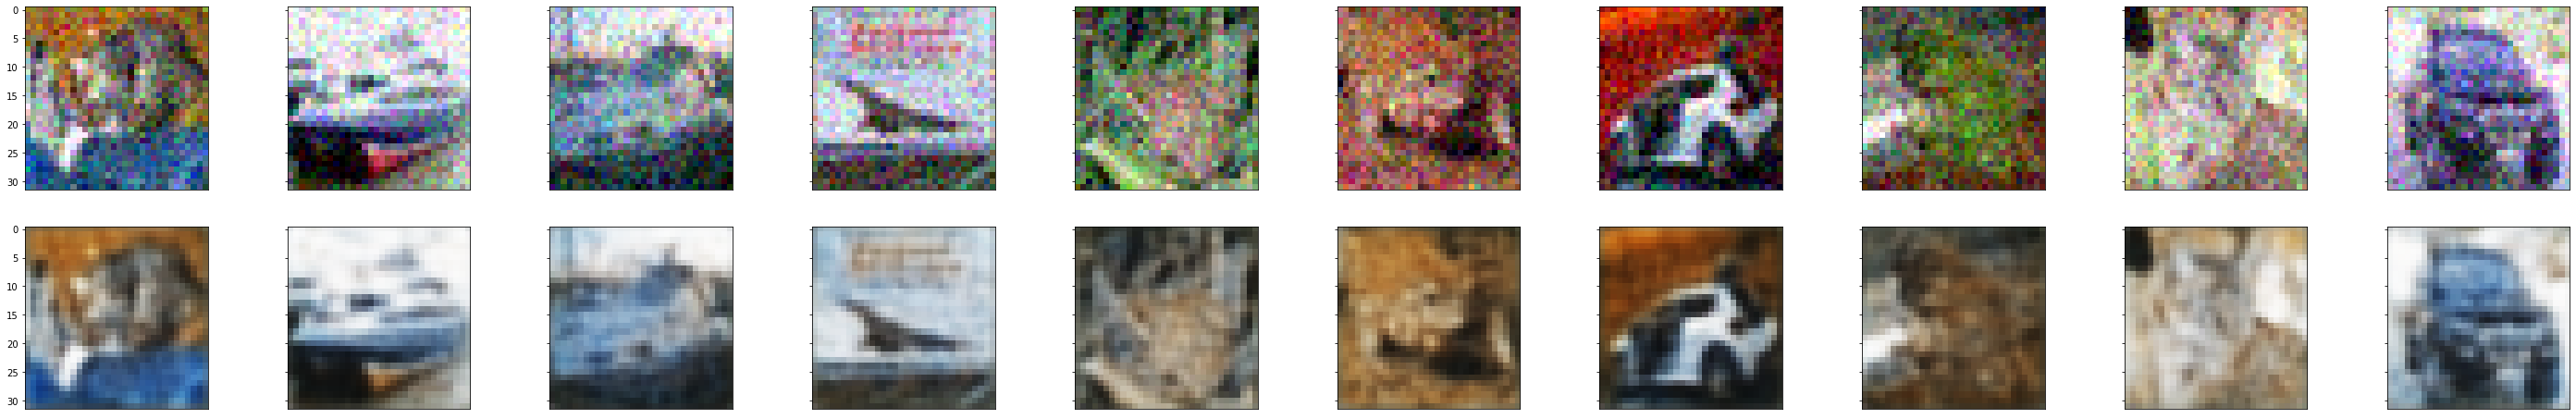

In [ ]:
fig,axes=plt.subplots(nrows=2,ncols=10,sharex=True,sharey=True,figsize=(50,8))
for images,row in zip([noise_test_dataset[:10],predicted],axes):
  for img,ax in zip(images,row):
    ax.imshow(img.reshape((32,32,3)),cmap='Greys_r')
    ax.get_xaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)